In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
dfDailyCasesAndDeaths=pd.read_csv('C:\Python_Program\DV1597_Intelligent_dataanalys\Assignment_2\Assignment_2_datasets\\1.COVID-19_daily_number_of_new_cases_and_deaths.csv')
dfVaccination=pd.read_csv('C:\Python_Program\DV1597_Intelligent_dataanalys\Assignment_2\Assignment_2_datasets\\2.COVID-19_vaccination.csv')
dfAdmissionRates=pd.read_csv('C:\Python_Program\DV1597_Intelligent_dataanalys\Assignment_2\Assignment_2_datasets\\3.COVID-19_hospital_and_ICU_admission_rates.csv')


#### Data

In [ ]:
dfDailyCasesAndDeaths

In [14]:
dfVaccination

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2021-W05,AT,423433.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age10_14,AZ,8932664
1,2023-W10,AT,1543886.0,0.0,0.0,0,NaN,1,0,0,0,0,0,0,AT,Age<18,NVXD,8978929
2,2023-W10,AT,1047888.0,0.0,0.0,1,NaN,0,0,1,0,0,0,0,AT,Age60_69,NVXD,8978929
3,2023-W10,AT,258398.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age15_17,MODBA.1,8978929
4,2023-W10,AT,7388778.0,0.0,0.0,3,NaN,1,4,80,53,0,0,0,AT,ALL,MOD,8978929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681325,2021-W25,SK,NaN,0.0,0.0,2,NaN,0,0,0,0,0,0,0,SK,AgeUNK,MOD,5459781
681326,2021-W25,SK,4431608.0,0.0,0.0,3665,NaN,0,0,0,0,0,0,0,SK,ALL,SPU,5459781
681327,2021-W25,SK,159879.0,0.0,0.0,1,NaN,0,0,0,0,0,0,0,SK,Age15_17,SPU,5459781
681328,2021-W25,SK,388502.0,0.0,0.0,99,NaN,0,0,0,0,0,0,0,SK,Age18_24,SPU,5459781


In [34]:
dfAdmissionRates

,country,indicator,date,year_week,value,source,url
0,Austria,Daily hospital occupancy,2020-04-01,2020-W14,856.000000,Country_Website,NaN
1,Austria,Daily hospital occupancy,2020-04-02,2020-W14,823.000000,Country_Website,NaN
2,Austria,Daily hospital occupancy,2020-04-03,2020-W14,829.000000,Country_Website,NaN
3,Austria,Daily hospital occupancy,2020-04-04,2020-W14,826.000000,Country_Website,NaN
4,Austria,Daily hospital occupancy,2020-04-05,2020-W14,712.000000,Country_Website,NaN
...,...,...,...,...,...,...,...
25095,Sweden,Weekly new ICU admissions per 100k,2023-03-26,2023-W12,0.066971,TESSy COVID-19 combined sources,NaN
25096,Sweden,Weekly new ICU admissions per 100k,2023-04-02,2023-W13,0.133941,TESSy COVID-19 combined sources,NaN
25097,Sweden,Weekly new ICU admissions per 100k,2023-04-09,2023-W14,0.105240,TESSy COVID-19 combined sources,NaN
25098,Sweden,Weekly new ICU admissions per 100k,2023-04-16,2023-W15,0.105240,TESSy COVID-19 combined sources,NaN


#### 1. 

In [ ]:
# Convert dateRep column to datetime format
dfDailyCasesAndDeaths['dateRep'] = pd.to_datetime(dfDailyCasesAndDeaths['dateRep'], dayfirst=True)

# Calculate quarter based on year and month
dfDailyCasesAndDeaths['quarter'] = dfDailyCasesAndDeaths['dateRep'].dt.quarter

# Calculate total cases by quarter and country
casesByQuarter = dfDailyCasesAndDeaths.groupby(['year', 'quarter', 'countriesAndTerritories'])['cases'].sum().reset_index()

# Identify top-10 countries by quarter
top10Countries = casesByQuarter.groupby(['year', 'quarter']).apply(lambda x: x.nlargest(10, 'cases')).reset_index(drop=True)

# Merge with population data
top10Countries = pd.merge(top10Countries, dfDailyCasesAndDeaths[['countriesAndTerritories', 'popData2020']].drop_duplicates(), on='countriesAndTerritories', how='left')

# Calculate cases per capita
top10Countries['casesPerCapita'] = top10Countries['cases'] / top10Countries['popData2020']

# Calculate relative case numbers
top10Countries['relativeCases'] = top10Countries['casesPerCapita'] / top10Countries['popData2020']

# Geographical analysis
geographicalData = dfDailyCasesAndDeaths[['countriesAndTerritories', 'geoId', 'continentExp']].drop_duplicates()

# Merge with geographical data
top10Countries = pd.merge(top10Countries, geographicalData, on='countriesAndTerritories', how='left')

# Print the top-10 countries with their respective data
top10Countries

#### 2. 

C:\Users\Sofia\AppData\Local\Temp\ipykernel_47432\3813762056.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


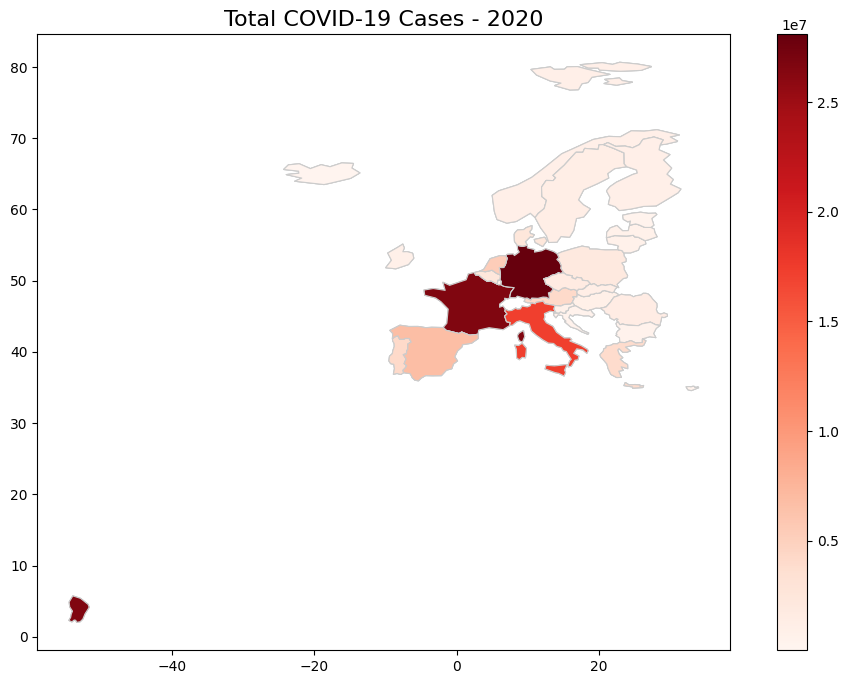

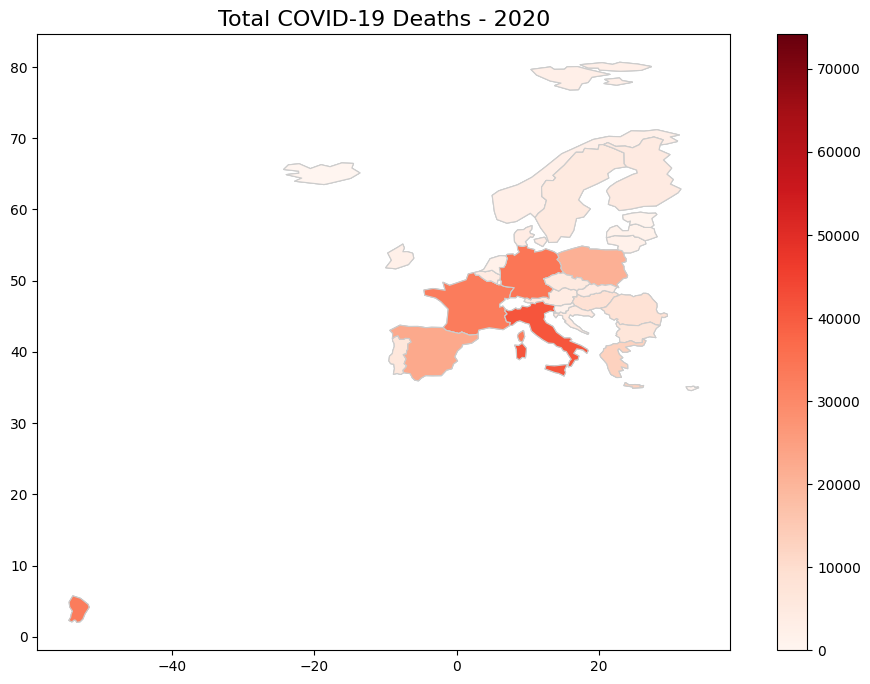

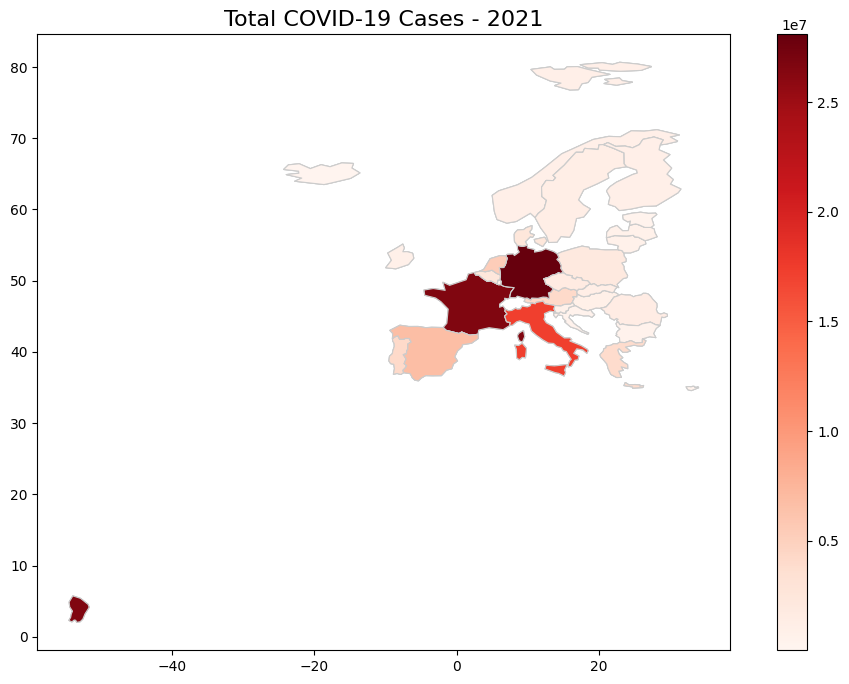

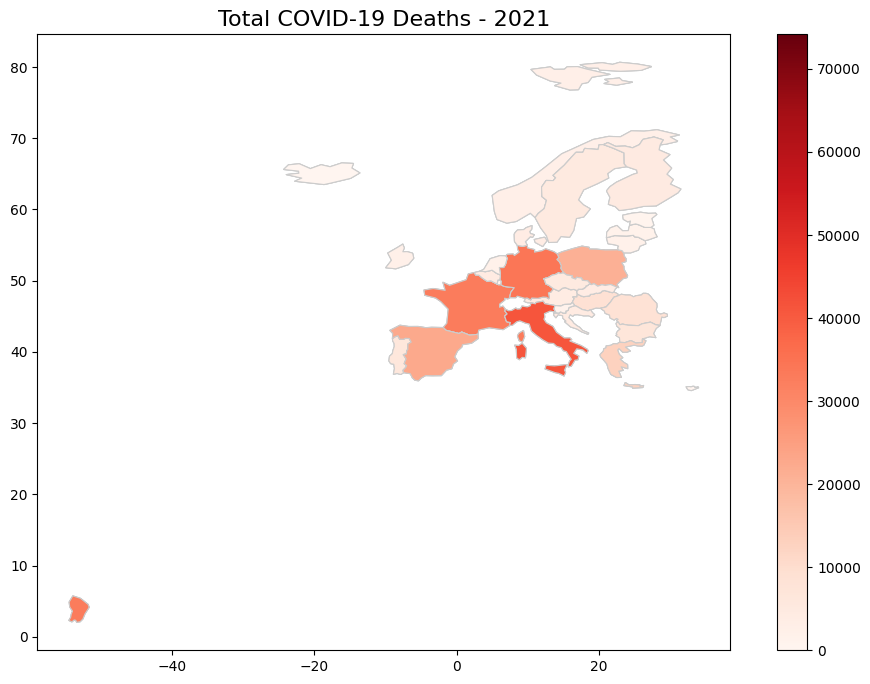

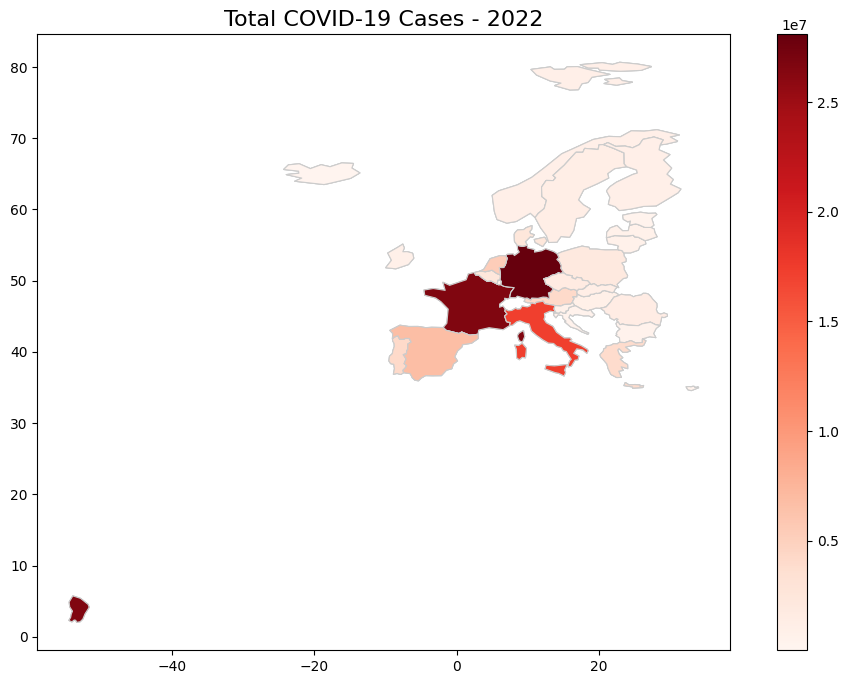

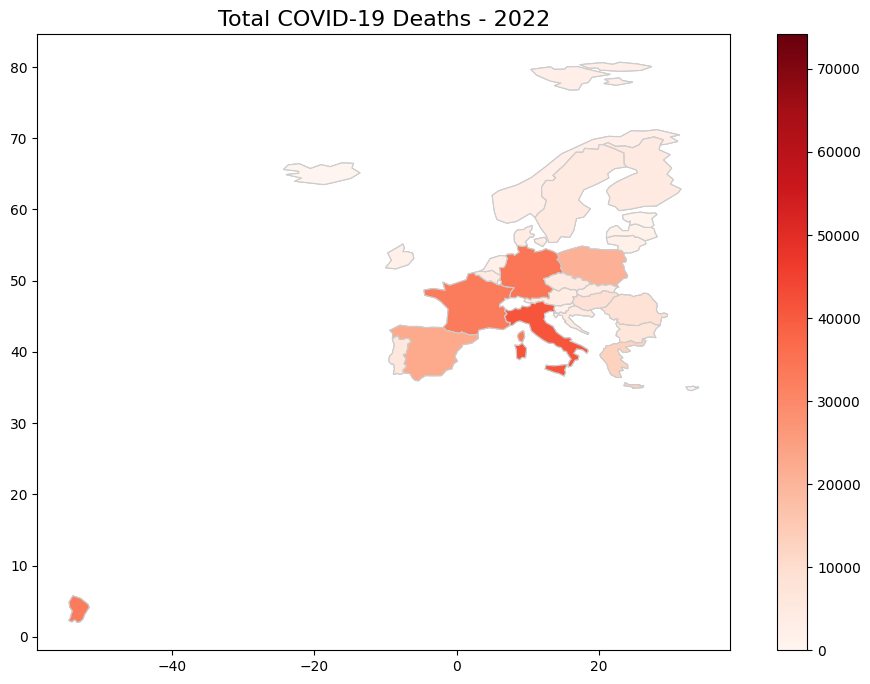

In [12]:
# # Read shapefile containing country boundaries
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Merge world shapefile with the provided data
# merged_data = world.merge(dfDailyCasesAndDeaths, left_on='iso_a3', right_on='countryterritoryCode', how='left')

# # Group data by year, country, and calculate the total cases and deaths
# grouped_data = merged_data.groupby(['year', 'countriesAndTerritories']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

# Filter the data for the years 2020, 2021, and 2022
filtered_data = dfDailyCasesAndDeaths[dfDailyCasesAndDeaths['year'].isin([2020, 2021, 2022])]

# Group the data by year, country, and calculate the total cases and deaths
grouped_data = filtered_data.groupby(['year', 'countriesAndTerritories']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

# Read the world shapefile or geopandas dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world shapefile with the grouped data
merged_data = world.merge(grouped_data, left_on='name', right_on='countriesAndTerritories', how='left')


# Iterate over each year and create choropleth map for cases and deaths
for year in [2020, 2021, 2022]:
    # Filter data for the given year
    year_data = grouped_data[grouped_data['year'] == year]

    # Create a new plot and set the title
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title(f'Total COVID-19 Cases - {year}', fontsize=16)

    # Plot the choropleth map of total cases
    merged_data.plot(column='cases', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Show the plot
    plt.show()

    # Create a new plot and set the title
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title(f'Total COVID-19 Deaths - {year}', fontsize=16)

    # Plot the choropleth map of total deaths
    merged_data.plot(column='deaths', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    plt.show()

#### 3. 

What are the top-3 popular vaccine brands that have been used across the EU/EEA? Can you observe the same popularity at the country level? Are there any exceptions?

In [20]:

# Group the data by vaccine and calculate the total doses administered
vaccineCounts = dfVaccination['Vaccine'].value_counts()

# Get the top-3 popular vaccine brands
top3Vaccines = vaccineCounts.head(3)

# Print the top-3 popular vaccine brands
top3Vaccines


COM      104833
MOD      100023
JANSS     92435
Name: Vaccine, dtype: int64

In [25]:
# Group the data by country and vaccine, and count the occurrences
country_vaccine_counts = dfVaccination.groupby(['ReportingCountry', 'Vaccine']).size().reset_index(name='Count')

# Sort the data by country and the count of occurrences in descending order
sorted_data = country_vaccine_counts.sort_values(['ReportingCountry', 'Count'], ascending=[True, False])

# Get the top-3 popular vaccine brands for each country
top_3_vaccines_by_country = sorted_data.groupby('ReportingCountry').head(3)

# Print the top-3 popular vaccine brands for each country
top_3_vaccines_by_country

,ReportingCountry,Vaccine,Count
0,AT,AZ,1452
1,AT,COM,1452
2,AT,COMBA.1,1452
12,BE,COM,1321
16,BE,MOD,1271
...,...,...,...
211,SI,MOD,716
207,SI,AZ,375
215,SK,COM,1264
217,SK,MOD,807


#### 4. 

In [28]:
# Group the data by country, vaccine, and target group, and calculate the count of occurrences
country_vaccine_target_counts = dfVaccination.groupby(['ReportingCountry', 'Vaccine', 'TargetGroup']).size().reset_index(name='Count')

# Sort the data by country, vaccine, and the count of occurrences in descending order
sorted_data = country_vaccine_target_counts.sort_values(['ReportingCountry', 'Vaccine', 'Count'], ascending=[True, True, False])

# Get the top target group for each vaccine brand in each country
top_target_groups_by_country_vaccine = sorted_data.groupby(['ReportingCountry', 'Vaccine']).head(1)

# Print the top target groups for each vaccine brand in each country
top_target_groups_by_country_vaccine

,ReportingCountry,Vaccine,TargetGroup,Count
0,AT,AZ,ALL,121
12,AT,COM,ALL,121
24,AT,COMBA.1,ALL,121
36,AT,COMBA.4-5,ALL,121
48,AT,JANSS,ALL,121
...,...,...,...,...
2372,SK,JANSS,ALL,108
2384,SK,MOD,ALL,114
2396,SK,NVXD,ALL,43
2404,SK,SPU,ALL,35


#### 5. 

In [33]:

# Group the data by country and calculate the total number of first dose refusals
country_refusals = dfVaccination.groupby('ReportingCountry')['FirstDoseRefused'].sum()

# Sort the data by the total number of first dose refusals in descending order
country_refusals.sort_values(ascending=False)

ReportingCountry
IS    581.0
BE      0.0
SI      0.0
SE      0.0
RO      0.0
PT      0.0
PL      0.0
NO      0.0
NL      0.0
MT      0.0
LV      0.0
LU      0.0
LT      0.0
LI      0.0
IT      0.0
AT      0.0
IE      0.0
HU      0.0
HR      0.0
FR      0.0
FI      0.0
ES      0.0
EL      0.0
EE      0.0
DK      0.0
DE      0.0
CZ      0.0
CY      0.0
BG      0.0
SK      0.0
Name: FirstDoseRefused, dtype: float64

In [35]:
# Merge the datasets on country and date
merged_data = pd.merge(dfVaccination, dfAdmissionRates, left_on=['ReportingCountry', 'YearWeekISO'], right_on=['country', 'year_week'], how='inner')

# Calculate the correlation coefficient between FirstDoseRefused and the number of new admissions
correlation = merged_data['FirstDoseRefused'].corr(merged_data['value'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)

Correlation Coefficient: nan
